In [1]:
import sys, os 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import f1_score, make_scorer
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
import spacy
from collections import Counter
from sklearn.neural_network import MLPClassifier

In [2]:
import re
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import os
def load_data(train_directory, test_file):
    train = pd.DataFrame(columns=["text", "label"])
    train_texts, train_labels = [], []
    print("Loading : train data")
    for file in os.listdir(train_directory+"/neg"):
        with open(train_directory+"/neg/"+file, "r") as f:
            train_texts.append(f.read())
            train_labels.append(-1)
    for file in os.listdir(train_directory +"/pos"):
        with open(train_directory +"/pos/" + file, "r") as f:
            train_texts.append(f.read())
            train_labels.append(1)
    test = pd.DataFrame(columns=["text"])
    test_texts = []
    print("Loading : test data")
    with open(test_file, "r") as f:
        for line in f : 
            line = line.rstrip()
            test_texts.append(line)
    train["text"] = train_texts
    train["label"] = train_labels
    test["text"] = test_texts
    encoder = preprocessing.LabelEncoder()
    train["label"] = encoder.fit_transform(train["label"])
    return train, test

In [3]:
train, test= load_data("../data/movies1000", "../data/moviesTest/testSentiment.txt")

Loading : train data
Loading : test data


# Count vectorizer

## text brut

In [243]:
train = shuffle(train)

In [82]:
clf = LinearSVC()
count_vect = CountVectorizer(analyzer='word',lowercase = False ,ngram_range= (1,3), min_df=5,max_df=0.5)
count_vect.fit(train["text"])
train_count =  count_vect.transform(train["text"])
Scores = cross_val_score( clf, train_count, train["label"], cv=5)

In [83]:
Scores

array([0.86  , 0.8325, 0.855 , 0.8325, 0.8775])

In [84]:
Scores.mean()

0.8515

## stemmisation

In [85]:
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize

In [86]:
stemmer = PorterStemmer()
stemmed = pd.DataFrame()
stemmed["label"] = train["label"]
stemmed["text"] = train["text"].apply(lambda x : " ".join([stemmer.stem(i) for i in word_tokenize(x)]))



In [89]:
stemmed.to_csv ("../cache/stemmed.csv", index = False, header=True) # saving it

### training

In [91]:
df = stemmed

In [120]:
clf = LinearSVC()
count_vect = CountVectorizer(analyzer='word',lowercase = False ,ngram_range= (1,1), min_df=5,max_df=0.5)
count_vect.fit(df["text"])
train_count =  count_vect.transform(df["text"])
Scores = cross_val_score( clf, train_count, df["label"], cv=5)

In [121]:
Scores.mean()

0.8320000000000001

## Lemmatisation :

In [135]:
nlp = spacy.load("en_core_web_sm")
free_stopwords, lemmatized, free_stopwords_lemmatized = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
lemmatized["label"] = train["label"].copy()
free_stopwords["label"] = train["label"].copy()
free_stopwords_lemmatized["label"] = train["label"].copy()
lemmatized["text"] = " "
free_stopwords["text"] = ""
free_stopwords_lemmatized["text"] = ""


for i, row in train.iterrows(): # do it all at once
    doc = nlp(row["text"])
    lemmatized.at[i, "text"] = " ".join([i.lemma_ for i in doc])
    free_stopwords.at[i, "text"] =" ".join([ i.text for i in doc if not i.is_stop])
    free_stopwords_lemmatized.at[i, "text"] =" ".join([ i.lemma_ for i in doc if not i.is_stop])
    
    if i % 1000 ==0:
        print("at row : " + str(i))

at row : 0
at row : 1000


In [136]:
free_stopwords_lemmatized.to_csv (r'../cache/lemmatized_free_stopwords.csv', index = False, header=True)
free_stopwords.to_csv (r'../cache/free_stopwords.csv', index = False, header=True)
lemmatized.to_csv (r'../cache/lemmatized.csv', index = False, header=True)

## train

In [138]:
df = shuffle(lemmatized)

In [157]:
clf = LinearSVC()
count_vect = CountVectorizer(analyzer='word',lowercase = False ,ngram_range= (1,2), min_df=5,max_df=0.5)
count_vect.fit(df["text"])
train_count =  count_vect.transform(df["text"])
Scores = cross_val_score( clf, train_count, df["label"], cv=5)

In [158]:
Scores.mean()

0.8535

## stop words

In [174]:
df = shuffle(free_stopwords_lemmatized)

In [193]:
clf = LinearSVC()
count_vect = CountVectorizer(analyzer='word',lowercase = False ,ngram_range= (1,3), min_df=5,max_df=0.5)
count_vect.fit(df["text"])
train_count =  count_vect.transform(df["text"])
Scores = cross_val_score( clf, train_count, df["label"], cv=5)

In [194]:
Scores.mean()

0.8160000000000001

## stemmed

In [198]:
stemmer = PorterStemmer()
stemmed_free_stopWords = pd.DataFrame()
stemmed_free_stopWords["label"] = free_stopwords["label"]
stemmed_free_stopWords["text"] = free_stopwords["text"].apply(lambda x : " ".join([stemmer.stem(i) for i in word_tokenize(x)]))

stemmed_free_stopWords.to_csv ("../cache/stemmed_free_stopWords.csv", index = False, header=True)

In [200]:
df = shuffle(stemmed_free_stopWords)

In [215]:
clf = LinearSVC()
count_vect = CountVectorizer(analyzer='word',lowercase = False ,ngram_range= (1,3), min_df=5,max_df=0.5)
count_vect.fit(df["text"])
train_count =  count_vect.transform(df["text"])
Scores = cross_val_score( clf, train_count, df["label"], cv=5)

/home/chekirou/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [216]:
Scores.mean()

0.8285

# TF-IDF

In [4]:
lemmatized = pd.read_csv(r'../cache/lemmatized.csv')

In [5]:
df = shuffle(lemmatized)
#df.reset_index(drop=True, inplace=True)


In [363]:
clf = LinearSVC()
count_vect = TfidfVectorizer(analyzer='word',lowercase = False ,ngram_range= (1,3), min_df=5, max_df= 0.5)
count_vect.fit(df["text"])
train_count =  count_vect.transform(df["text"])
Scores = cross_val_score( clf, train_count, df["label"], cv=5)


In [409]:
train,TrainL, test,TestL = texts[:int(0.8*labels.shape[0])], labels[:int(0.8*labels.shape[0])],texts[int(0.8*texts.shape[0]):],labels[int(0.8*labels.shape[0]):]

In [6]:
#df, df1 = df.loc[:int(0.8*df.shape[0])], df.loc[int(0.8*df.shape[0]):]
clf = LinearSVC()
count_vect = TfidfVectorizer(analyzer='word',lowercase = False ,ngram_range= (1,3), min_df=5, max_df= 0.5)
count_vect.fit(df["text"])
train_count =  count_vect.transform(df["text"])
clf.fit(train_count, df["label"])


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [7]:
test = count_vect.transform(test["text"])
pred = clf.predict(test)

In [11]:
pred.shape

(25000,)

In [51]:
vocab = count_vect.vocabulary_
vocab_inverse = {v: k for k,v in vocab.items()}

In [52]:
coef = clf.coef_

In [53]:
mostnegative =  np.argsort(coef[0])[:15]
mostnegative = [vocab_inverse[k] for k in mostnegative]

In [54]:
mostpositif = reversed(np.argsort(coef[0])[-15:])
mostpositif = [vocab_inverse[k] for k in mostpositif]

In [55]:
best_words = np.vstack((np.array(mostnegative), np.array(mostpositif))).transpose()

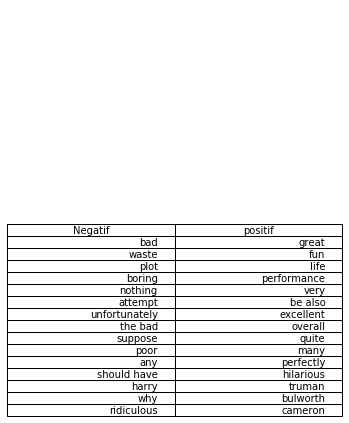

In [56]:
fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

the_table = plt.table(cellText=best_words,
                      colLabels=["Negatif", "positif"],
                      loc='bottom')

plt.show()

In [59]:
pred[:50]

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0])

In [60]:

file = open("prediction_movies.txt", "w")
for i in pred:
    if i ==1:
        file.write("1\n")
    else:
        file.write("0\n")
file.close()

# pos tags

In [221]:
POS_LIST = ["ADJ", "ADP", "ADV", "AUX", "CONJ", "CCONJ", "DET", "INTJ", "NOUN", "NUM", "PART", "PRON", "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X", "SPACE"]
pos_tag = pd.DataFrame()
pos_tag["label"] = train["label"]
for k in POS_LIST:
  pos_tag[k] = 0
pos_tag["length"] = train["text"].apply(lambda x : len(x.split())) # adding a column for the length of the sentences
for i, row in train.iterrows():
    d = dict(Counter([i.pos_ for i in nlp(row["text"])])) # counting the number of each type
    for k, v in d.items():
        pos_tag.at[i, k] = v
    if i % 200 == 0:
        print(i)
pos_tag.to_csv ("../cache/pos_tags.csv", index = False, header=True) # save it in cache



0
200
400
600
800
1000
1200
1400
1600
1800


In [224]:
df = shuffle(pos_tag)

In [226]:
data, label = df.loc[:, "ADJ":], df["label"]

## tests

In [233]:
print("NB")
NB = MultinomialNB()
ScoresNB = cross_val_score(NB , data, label, cv=5).mean()
print("LR")
LR = LogisticRegression()
ScoresLR = cross_val_score(LR , data, label, cv=5).mean()
print("RF")
RF = RandomForestClassifier()
ScoresRF = cross_val_score(RF , data, label, cv=5).mean()
print("MLP")
MLP = MLPClassifier(hidden_layer_sizes= (30))
ScoresMLP = cross_val_score(MLP , data, label, cv=5).mean()

NB
LR
RF


/home/chekirou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/chekirou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/chekirou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/chekirou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/chekirou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

MLP


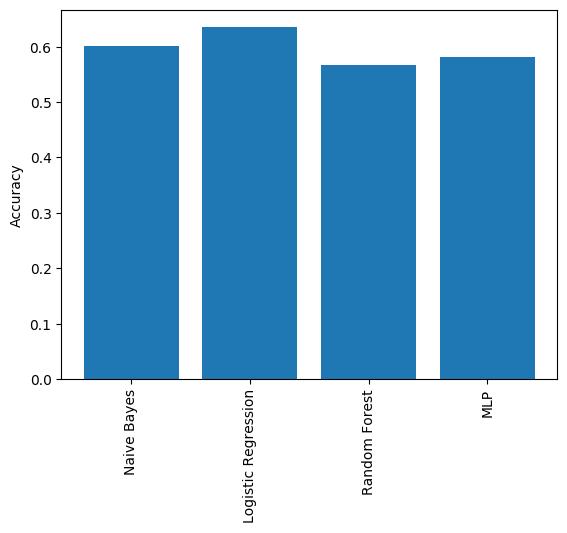

In [239]:
plt.rcdefaults()
plt.xticks(rotation='vertical')
plt.ylabel("Accuracy")
plt.bar(["Naive Bayes", "Logistic Regression", "Random Forest", "MLP"], [ScoresNB, ScoresLR, ScoresRF, ScoresMLP])
plt.show()